In [1]:
import pandas as pd
from nltk.corpus import wordnet as wn, wordnet_ic as wn_ic, lin_thesaurus as lin
import operator
import nltk
nltk.download()

# nltk.download('punkt')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
print(wn.synsets("book"))
print(wn.synsets("book", wn.NOUN))

[Synset('book.n.01'), Synset('book.n.02'), Synset('record.n.05'), Synset('script.n.01'), Synset('ledger.n.01'), Synset('book.n.06'), Synset('book.n.07'), Synset('koran.n.01'), Synset('bible.n.01'), Synset('book.n.10'), Synset('book.n.11'), Synset('book.v.01'), Synset('reserve.v.04'), Synset('book.v.03'), Synset('book.v.04')]
[Synset('book.n.01'), Synset('book.n.02'), Synset('record.n.05'), Synset('script.n.01'), Synset('ledger.n.01'), Synset('book.n.06'), Synset('book.n.07'), Synset('koran.n.01'), Synset('bible.n.01'), Synset('book.n.10'), Synset('book.n.11')]


In [3]:
synsetA = wn.synsets("book", wn.NOUN)[0]

print(synsetA)
print("def-", synsetA.definition())
print("hypo-", synsetA.hyponyms())
# print(synsetA.hyponyms()[1].definition())
print("hyper-", synsetA.hypernyms())

Synset('book.n.01')
def- a written work or composition that has been published (printed on pages bound together)
hypo- [Synset('appointment_book.n.01'), Synset('authority.n.07'), Synset('bestiary.n.01'), Synset('booklet.n.01'), Synset('catalog.n.01'), Synset('catechism.n.02'), Synset('copybook.n.01'), Synset('curiosa.n.01'), Synset('formulary.n.01'), Synset('phrase_book.n.01'), Synset('playbook.n.02'), Synset('pop-up_book.n.01'), Synset('prayer_book.n.01'), Synset('reference_book.n.01'), Synset('review_copy.n.01'), Synset('songbook.n.01'), Synset('storybook.n.01'), Synset('textbook.n.01'), Synset('tome.n.01'), Synset('trade_book.n.01'), Synset('workbook.n.01'), Synset('yearbook.n.01')]
hyper- [Synset('publication.n.01')]


In [4]:
synsetB = wn.synsets("book", wn.NOUN)[1]
print(synsetB)

print(synsetA.path_similarity(synsetB))

# Loading an Information Content (IC) File: The first line brown_ic = wn_ic.ic("ic-brown.dat") loads an information content (IC) file named ic-brown.dat. Information content is a measure used in computational linguistics to quantify the amount of information a word provides. The ic-brown.dat file likely contains information content values derived from the Brown Corpus, a collection of text samples from a wide range of sources, and is used to compute semantic relatedness or similarity between words or synsets in WordNet. The wn_ic.ic() function is a method to load these values into a format that can be used by other functions or methods.

brown_ic = wn_ic.ic("ic-brown.dat")
print(synsetA.res_similarity(synsetB, brown_ic))
print(synsetA.lin_similarity(synsetB, brown_ic))

# Path similarity ranges from 0 to 1, with 1 being the most similar.
# Resnik similarity is non-negative with no fixed upper limit, where higher values indicate greater similarity.
# Lin similarity ranges from 0 to 1, with 1 indicating perfect similarity.

Synset('book.n.02')
0.2


5.454686565783099
0.7098990245459575


In [5]:
def get_path_sim(word1, word2, wn_wordtype, sim_measure="path", ic_data=None):
    if sim_measure != "path" and ic_data == None:
        print('ERROR - IC DATA NEEDED')
        return 0
    word1_synsets = wn.synsets(word1, wn_wordtype)
    word2_synsets = wn.synsets(word2, wn_wordtype)
    # print("running")
    # print(word1_synsets)
    # print(word2_synsets)

    results = []
    for word1_sense in word1_synsets:
        for word2_sense in word2_synsets:
            if sim_measure == "path":
                results.append((word1_sense, word2_sense,
                                word1_sense.path_similarity(word2_sense)))
            elif sim_measure == "res":
                results.append((word1_sense, word2_sense,
                                word1_sense.res_similarity(word2_sense, ic_data)))
            elif sim_measure == "lin":
                results.append((word1_sense, word2_sense,
                                word1_sense.lin_similarity(word2_sense, ic_data)))
            else:
                print(f"ERROR - uknown similarity measure: {sim_measure}")
    # print(results)
    max_tuple = max(results, key=lambda x: x[2])
    # print("--------------")
    # print(f"closest senses for {word1} and {word2} have {sim_measure.upper()} similarity of {max_tuple[2]:.4f}")
    # print(f"{word1}: {max_tuple[0].definition()}")
    # print(f"{word2}: {max_tuple[1].definition()}")
    # print("--------------")

    # print(max_tuple)

    # results.sort(key=lambda x: x[2], reverse = True)
    # print(results)

    return max_tuple[2]


get_path_sim("chicken", "car", wn.NOUN)
get_path_sim("chicken", "car", wn.NOUN, "res", brown_ic)
get_path_sim("chicken", "car", wn.NOUN, "lin", brown_ic)

0.17900106582025765

In [6]:

df = pd.read_csv("./mcdata.csv", header=None)
df.columns = ["word1", "word2", "human_score"]

In [7]:
word_pairs = list(zip(df["word1"], df["word2"]))

path_scores = [get_path_sim(word1, word2, wn.NOUN)
               for word1, word2 in word_pairs]

# word_pairs = zip(df["word1"], df["word2"])

res_scores = [get_path_sim(word1, word2, wn.NOUN, "res", brown_ic)
              for word1, word2 in word_pairs]

# word_pairs = zip(df["word1"], df["word2"])
lin_scores = [get_path_sim(word1, word2, wn.NOUN, "lin", brown_ic)
              for word1, word2 in word_pairs]

In [8]:
df["path_score"] = path_scores
df["res_score"] = res_scores
df["lin_score"] = lin_scores

In [9]:
df

,word1,word2,human_score,path_score,res_score,lin_score
0,asylum,madhouse,3.61,0.500000,9.475167,0.855584
1,bird,cock,3.05,0.500000,7.677755,0.773937
2,bird,crane,2.97,0.250000,7.677755,0.747812
3,boy,lad,3.76,0.500000,8.399492,0.830562
4,brother,monk,2.82,0.500000,9.261593,0.986407
5,car,automobile,3.92,1.000000,7.591401,1.000000
6,cemetery,woodland,0.95,0.111111,1.290026,0.123441
7,chord,smile,0.13,0.090909,2.619644,0.246256
8,coast,forest,0.42,0.166667,1.290026,0.130646
9,coast,hill,0.87,0.200000,5.884681,0.599113


In [10]:
import pandas as pd
from scipy.stats import spearmanr

# Assuming 'df' is your pandas DataFrame

# Columns to correlate
columns = ['human_score', 'path_score', 'res_score', 'lin_score']

# Print Spearman correlation for each pair
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        corr, p_value = spearmanr(df[columns[i]], df[columns[j]])
        print(
            f"Spearman correlation between {columns[i]} and {columns[j]}: {corr:.4f} (p={p_value:.4g})")

Spearman correlation between human_score and path_score: 0.7227 (p=6.464e-06)
Spearman correlation between human_score and res_score: 0.7359 (p=3.575e-06)
Spearman correlation between human_score and lin_score: 0.7535 (p=1.538e-06)
Spearman correlation between path_score and res_score: 0.9006 (p=1.207e-11)
Spearman correlation between path_score and lin_score: 0.9455 (p=3.565e-15)
Spearman correlation between res_score and lin_score: 0.9627 (p=1.961e-17)


In [11]:
# Compute Spearman correlation matrix
corr_matrix = df[['human_score', 'path_score',
                  'res_score', 'lin_score']].corr(method='spearman')

print(corr_matrix)

             human_score  path_score  res_score  lin_score
human_score     1.000000    0.722743   0.735945   0.753510
path_score      0.722743    1.000000   0.900648   0.945509
res_score       0.735945    0.900648   1.000000   0.962707
lin_score       0.753510    0.945509   0.962707   1.000000


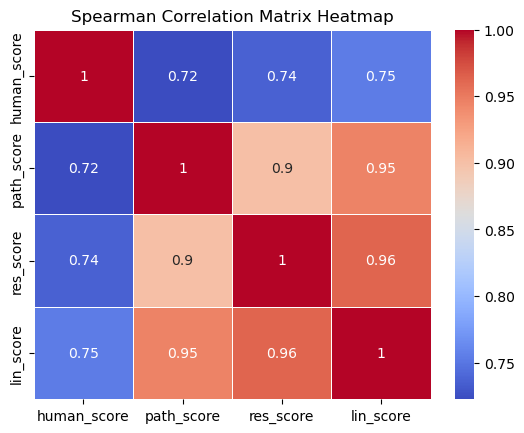

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'corr_matrix' is the Spearman correlation matrix you computed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

## Interpreting Correlation Data

Interpreting correlation data, especially from Spearman's rank correlation coefficient, involves understanding the strength and direction of the relationship between two variables. The correlation coefficient (often denoted as \(r_s\)) ranges from -1 to +1, where:

- **+1** indicates a perfect positive correlation: as one variable increases, the other variable also increases.
- **-1** indicates a perfect negative correlation: as one variable increases, the other variable decreases.
- **0** indicates no correlation: there is no linear relationship between the variables.

### Positive Values

Positive values close to +1 suggest that as one score increases, the other score tends to also increase. This indicates a strong agreement between the variables. For instance, if the `human_score` and `lin_score` have a correlation close to +1, it means that as the human judgment of similarity increases, the Lin similarity score also tends to be higher, suggesting that the Lin similarity measure aligns well with human judgment.

### Negative Values

Negative values close to -1 suggest an inverse relationship. However, in the context of similarity scores, negative values are less common and typically indicate an error or a non-standard type of analysis.

### Values Around 0

Values around 0 suggest that there is no linear relationship between the two variables. However, it's important to note that Spearman's correlation assesses monotonic relationships, so a zero or near-zero value indicates a lack of even a monotonic relationship.


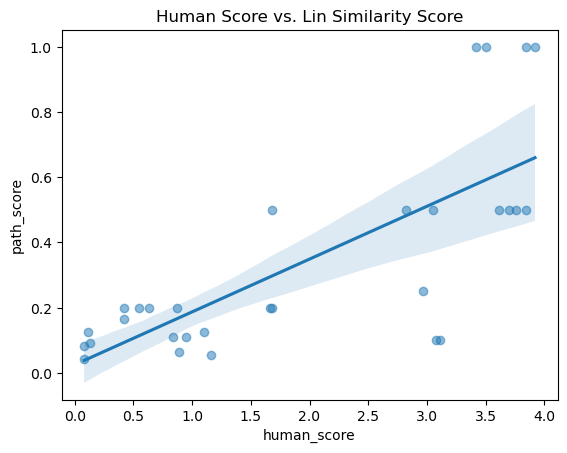

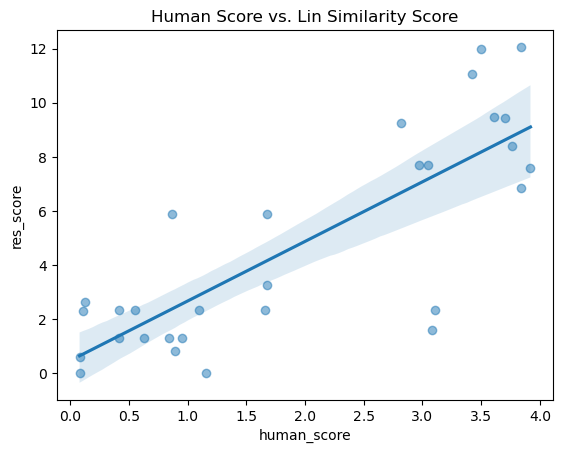

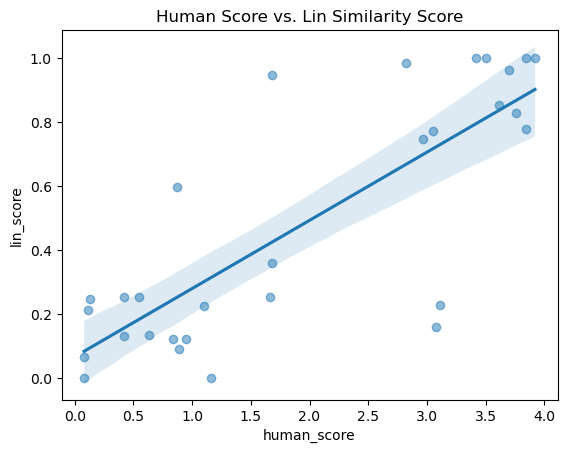

In [16]:
for sim_meas in ["path_score", "res_score", "lin_score"]:

    sns.regplot(x='human_score', y=sim_meas, data=df,
                fit_reg=True, scatter_kws={'alpha': 0.5})
    plt.title('Human Score vs. Lin Similarity Score')
    plt.show()